# Part I - Bikeshare Exploration for the Greater San Francisco Bay Area , New York City & Washington DC Metro area

## by Princewill Okechukwu

## Introduction
 The FordGoBike system dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This data will be merged with Citi bike system data covering New York City and Capital bike share data covering Washington DC Metro area.





## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [3]:
df_sf= pd.read_csv('201902-fordgobike-tripdata.csv') #San Franciso bike share data
df_nyc = pd.read_csv('201902-citibike-tripdata.csv') #NYC Bike share data
df_dc = pd.read_csv('201902-capitalbikeshare-tripdata.csv') #washington metro area 

In [4]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df_sf.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df_sf.isnull().sum()
#missing = df_sf[df_sf['member_birth_year'].isna()]

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943744 entries, 0 to 943743
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             943744 non-null  int64  
 1   starttime                943744 non-null  object 
 2   stoptime                 943744 non-null  object 
 3   start station id         943735 non-null  float64
 4   start station name       943735 non-null  object 
 5   start station latitude   943744 non-null  float64
 6   start station longitude  943744 non-null  float64
 7   end station id           943735 non-null  float64
 8   end station name         943735 non-null  object 
 9   end station latitude     943744 non-null  float64
 10  end station longitude    943744 non-null  float64
 11  bikeid                   943744 non-null  int64  
 12  usertype                 943744 non-null  object 
 13  birth year               943744 non-null  int64  
 14  gend

In [8]:
df_nyc.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,9.437440e+05,943735.000000,943744.000000,943744.000000,943735.000000,943744.000000,943744.000000,943744.000000,943744.000000,943744.000000
mean,8.047733e+02,1614.552153,40.737283,-73.982164,1604.586391,40.737153,-73.982407,28968.990799,1979.224374,1.176684
std,7.509697e+03,1456.227953,0.030139,0.018546,1455.324186,0.029901,0.018603,6248.873530,12.176740,0.472637
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.043991,14529.000000,1885.000000,0.000000
25%,3.150000e+02,382.000000,40.718822,-73.994564,380.000000,40.718822,-73.994685,26013.000000,1970.000000,1.000000
50%,5.180000e+02,507.000000,40.738274,-73.985011,507.000000,40.738274,-73.985649,30929.000000,1982.000000,1.000000
75%,8.790000e+02,3263.000000,40.756604,-73.972826,3263.000000,40.756405,-73.973442,34045.000000,1989.000000,1.000000
max,2.403037e+06,3745.000000,40.866000,-73.881000,3745.000000,40.866000,-73.881000,37907.000000,2003.000000,2.000000


In [9]:
df_nyc.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           9
start station name         9
start station latitude     0
start station longitude    0
end station id             9
end station name           9
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [10]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158130 entries, 0 to 158129
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Duration              158130 non-null  int64 
 1   Start date            158130 non-null  object
 2   End date              158130 non-null  object
 3   Start station number  158130 non-null  int64 
 4   Start station         158130 non-null  object
 5   End station number    158130 non-null  int64 
 6   End station           158130 non-null  object
 7   Bike number           158130 non-null  object
 8   Member type           158130 non-null  object
dtypes: int64(3), object(6)
memory usage: 10.9+ MB


In [11]:
df_dc.describe()

,Duration,Start station number,End station number
count,158130.000000,158130.000000,158130.000000
mean,895.846348,31336.298798,31337.529811
std,2279.471680,228.353447,226.776089
min,60.000000,31000.000000,31000.000000
25%,349.000000,31203.000000,31206.000000
50%,577.000000,31264.000000,31262.000000
75%,957.000000,31522.000000,31523.000000
max,86100.000000,32407.000000,32407.000000


In [12]:
df_dc.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

### What is the structure of your dataset?

The df_sf containing Bikeshare data for San Franciso Greater Bay Area contains 183412 observations with 16 variables, this is the primary dataset, the other two datasets: the New York City dataset which contains 943744 observations and 15 variables and the Washington DC Metro area dataset which contains 158130 observations and 9 variables will be analyzed along side when necessary.


### What is/are the main feature(s) of interest in your dataset?

 Trip duration in minutes is the main feature of these datasets. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The datasets will be wrangled and some more features will be extracted from the datasets. We'll see how features such as: age, member type, start station, gender, day of week and period of day affects the trip duration.

#### Handling Missing data in the df_sf

let us first make a copy of the datasets

In [13]:
df_sf_copy = df_sf.copy()
df_nyc_copy = df_nyc.copy()
df_dc_copy = df_dc.copy()

In [14]:
df_sf_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

For member birth_year we can replace the missing values with the median of the birth year 

In [15]:
df_sf_copy['member_birth_year'] = df_sf_copy['member_birth_year'].fillna(df_sf_copy['member_birth_year'].median())
df_sf_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We can also replace the missing values using the forward fill method

In [16]:
df_sf_copy.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [17]:
df_sf_copy.member_gender = df_sf_copy.member_gender.fillna(method='ffill')
df_sf_copy.member_gender.value_counts()

Male      136806
Female     42783
Other       3823
Name: member_gender, dtype: int64

we can drop the rows with missing data in df_sf_copy and df_nyc_copy

In [18]:
df_sf_copy.dropna(inplace= True)
df_nyc_copy.dropna(inplace=True)

#### converting the time columns to datetime data type

In [19]:

#date_columns = [df_sf_copy['start_time'],df_sf_copy['end_time'],df_nyc_copy['starttime'],df_nyc_copy['stoptime'],df_dc_copy['Start date'],df_dc_copy['End date']]

#for dateobj in date_columns:
#    dateobj = pd.to_datetime(dateobj)

In [38]:
df_sf_copy['start_time'] = pd.to_datetime(df_sf_copy['start_time'])
df_sf_copy['end_time'] = pd.to_datetime(df_sf_copy['end_time'])
df_nyc_copy['starttime'] = pd.to_datetime(df_nyc_copy['starttime'])
df_nyc_copy['stoptime'] = pd.to_datetime(df_nyc_copy['stoptime'])
df_dc_copy['Start date'] = pd.to_datetime(df_dc_copy['Start date'])
df_dc_copy['End date'] = pd.to_datetime(df_dc_copy['End date'])


Converting 'duration_sec' to minutes in df_sf_copy to be uniform with the other datasets

In [30]:
df_sf_copy['duration_min'] = [x/60 for x in df_sf_copy['duration_sec']]
df_sf_copy['duration_min'] = df_sf_copy['duration_min'].round(1)
df_sf_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.8,35
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1987.0,Male,No,708.7,32


Converting 'tripduration' to minutes in df_nyc_copy to be uniform with the other datasets

In [31]:
df_nyc_copy['duration_min'] = [x/60 for x in df_nyc_copy['tripduration']]
df_nyc_copy['duration_min'] = df_nyc_copy['duration_min'].round(1)
df_nyc_copy.head(2)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration_min,age
0,219,2019-02-01 00:00:06.257,2019-02-01 00:03:46.109,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1,3.6,30
1,143,2019-02-01 00:00:28.032,2019-02-01 00:02:51.746,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,1,2.4,29


Converting 'Duration' to minutes in df_dc_copy to be uniform with other datasets

In [39]:
df_dc_copy['duration_min'] = [x/60 for x in df_dc_copy['Duration']]
df_dc_copy['duration_min'] = df_dc_copy['duration_min'].round(1)
df_dc_copy.head(2)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,duration_min
0,206,2019-02-01 00:00:20,2019-02-01 00:03:47,31509,New Jersey Ave & R St NW,31636,New Jersey Ave & N St NW/Dunbar HS,W21713,Member,3.4
1,297,2019-02-01 00:04:40,2019-02-01 00:09:38,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,E00013,Member,5.0


In [40]:
df_dc_copy.duration_min.describe()

count    158130.000000
mean         14.930754
std          37.991146
min           1.000000
25%           5.800000
50%           9.600000
75%          16.000000
max        1435.000000
Name: duration_min, dtype: float64

Doing some Feature Engineering to extract age as of 2019 for df_sf_copy and df_nyc_copy

In [41]:
df_sf_copy['age'] = [int(2019 - x) for x in df_sf_copy['member_birth_year']]
df_nyc_copy['age'] = [int(2019 - x) for x in df_nyc_copy['birth year']]

Extract Hour() and day of week from the start time columns 

In [42]:
df_sf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In [43]:
df_sf_copy['hour'] = df_sf_copy['start_time'].dt.hour
df_nyc_copy['hour'] = df_nyc_copy['starttime'].dt.hour
df_dc_copy['hour']= df_dc_copy['Start date'].dt.hour

Let's have a function for Period of the Day

In [44]:
df_sf_copy.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,hour
142374,886,2019-02-07 17:03:15.627,2019-02-07 17:18:02.606,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5261,Subscriber,1991.0,Female,No,14.8,28,17
166668,512,2019-02-04 18:23:16.498,2019-02-04 18:31:48.852,100.0,Bryant St at 15th St,37.767100,-122.410662,107.0,17th St at Dolores St,37.763015,-122.426497,4619,Customer,1984.0,Male,No,8.5,35,18
95225,184,2019-02-15 14:40:38.696,2019-02-15 14:43:43.128,123.0,Folsom St at 19th St,37.760594,-122.414817,108.0,16th St Mission BART,37.764710,-122.419957,5552,Subscriber,1972.0,Male,No,3.1,47,14
151683,204,2019-02-06 17:07:52.514,2019-02-06 17:11:17.022,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,5211,Subscriber,1999.0,Female,No,3.4,20,17
76378,522,2019-02-19 08:21:57.204,2019-02-19 08:30:39.908,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,58.0,Market St at 10th St,37.776619,-122.417385,4817,Subscriber,1967.0,Male,No,8.7,52,8
60931,891,2019-02-20 18:00:21.225,2019-02-20 18:15:13.137,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,52.0,McAllister St at Baker St,37.777416,-122.441838,5849,Subscriber,1993.0,Male,No,14.8,26,18
117100,379,2019-02-12 05:51:20.862,2019-02-12 05:57:40.295,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,89.0,Division St at Potrero Ave,37.769218,-122.407646,2940,Customer,1991.0,Male,No,6.3,28,5
72039,519,2019-02-19 16:57:59.773,2019-02-19 17:06:39.551,144.0,Precita Park,37.747300,-122.411403,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,4974,Customer,1986.0,Male,No,8.6,33,16
116521,115,2019-02-12 07:48:47.013,2019-02-12 07:50:42.310,26.0,1st St at Folsom St,37.787290,-122.394380,24.0,Spear St at Folsom St,37.789677,-122.390428,2093,Subscriber,1985.0,Male,No,1.9,34,7
147314,587,2019-02-07 07:57:06.418,2019-02-07 08:06:53.974,58.0,Market St at 10th St,37.776619,-122.417385,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5454,Subscriber,1983.0,Male,No,9.8,36,7


In [45]:
def day_period(x):
    """
    This function returns the period of the day based on the hour of the day given. 
    
    Returns : Early Morning: If the Hour of the day is less than 08:00
    
              Late Morning: If the Hour of the day is 09:00 or greater, but less than 12:00. 
              
              Early Afternoon: If the Hour of the day is 12:00 or greater, but less than 15:00
              
              Late Afternoon: If the Hour of the day is 15:00 or greater, but less than 17:00
              
              Early Evening: If the Hour of the day is 17:00 or greater, but less than 20:00
              
              Late Evening: if the Hour of the day is 20:00 or greater
    """
    if (x < 9):
        return 'Early Morning'
    elif (x >= 9 and x < 12):
        return 'Late Morning'
    elif (x >=12 and x < 15 ):
        return 'Early Afternoon'
    elif (x >= 15 and x <17):
        return 'Late Afternoon'
    elif (x >= 17 and x < 20):
        return 'Early Evening'
    else:
        return 'Late Evening'

In [46]:
df_sf_copy['period_of_day'] = df_sf_copy['hour'].apply(day_period)
df_nyc_copy['period_of_day'] = df_sf_copy['hour'].apply(day_period)
df_dc_copy['period_of_day'] = df_sf_copy['hour'].apply(day_period)


In [47]:
df_sf_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,hour,period_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.8,35,17,Early Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1987.0,Male,No,708.7,32,18,Early Evening


Extracting Day of Week 

In [48]:
df_sf_copy['day_of_week'] = df_sf_copy['start_time'].dt.strftime('%A')
df_nyc_copy['day_of_week'] = df_nyc_copy['starttime'].dt.strftime('%A')
df_dc_copy['day_of_week']= df_dc_copy['Start date'].dt.strftime('%A')

In [49]:
#df_sf_copy.sample(10)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### 1. What is the distribution of Trip Duration in minutes for the 3 Cities?

In [50]:
df_nyc_copy.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,duration_min,age,hour
count,9.437350e+05,943735.000000,943735.000000,943735.000000,943735.000000,943735.000000,943735.000000,943735.000000,943735.00000,943735.000000,943735.000000,943735.00000,943735.000000
mean,8.047679e+02,1614.552153,40.737282,-73.982165,1604.586391,40.737152,-73.982408,28968.937752,1979.22427,1.176685,13.412788,39.77573,13.623427
std,7.509731e+03,1456.227953,0.030137,0.018544,1455.324186,0.029899,0.018601,6248.879714,12.17672,0.472639,125.162205,12.17672,4.763361
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.043991,14529.000000,1885.00000,0.000000,1.000000,16.00000,0.000000
25%,3.150000e+02,382.000000,40.718822,-73.994564,380.000000,40.718822,-73.994685,26013.000000,1970.00000,1.000000,5.200000,30.00000,9.000000
50%,5.180000e+02,507.000000,40.738274,-73.985011,507.000000,40.738274,-73.985649,30929.000000,1982.00000,1.000000,8.600000,37.00000,14.000000
75%,8.790000e+02,3263.000000,40.756604,-73.972826,3263.000000,40.756405,-73.973442,34045.000000,1989.00000,1.000000,14.600000,49.00000,17.000000
max,2.403037e+06,3745.000000,40.814394,-73.907744,3745.000000,40.814394,-73.907744,37907.000000,2003.00000,2.000000,40050.600000,134.00000,23.000000


Text(0.5, 1.0, 'Trip Duration(min) for Washington')

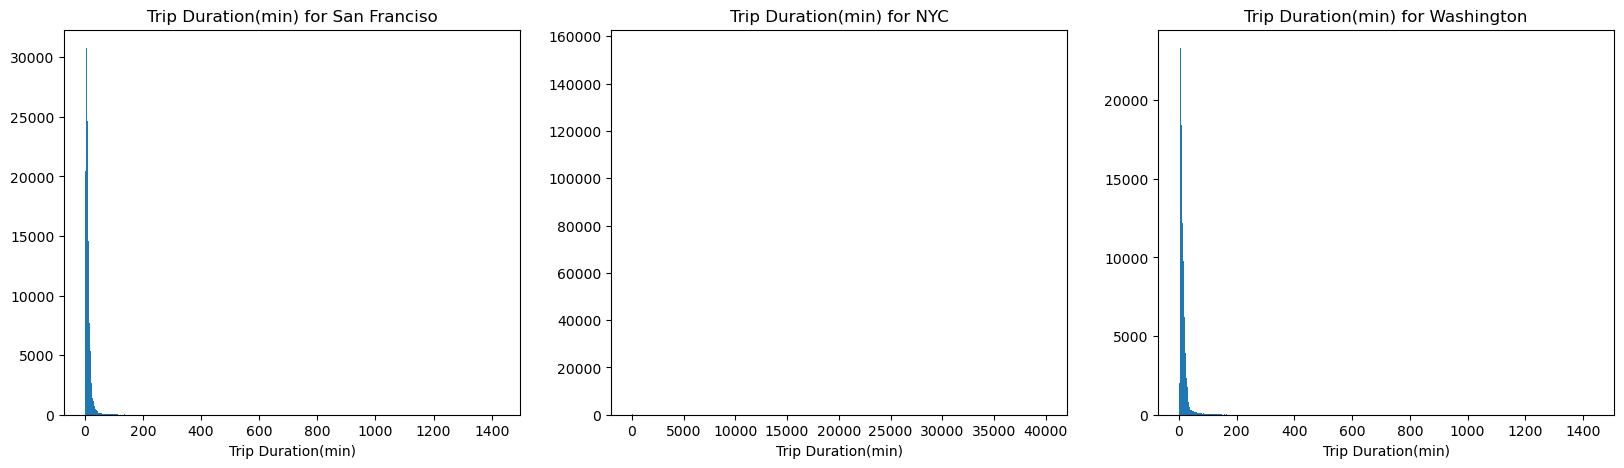

In [51]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1,3,1)
binsize = 2
bins = np.arange(0, df_sf_copy['duration_min'].max()+binsize, binsize)
plt.hist(data = df_sf_copy, x = 'duration_min', bins = bins);
plt.xlabel('Trip Duration(min)')
plt.title('Trip Duration(min) for San Franciso');

plt.subplot(1,3,2)
binsize = 2
bins = np.arange(0, df_nyc_copy['duration_min'].max()+binsize, binsize)
plt.hist(data = df_nyc_copy, x = 'duration_min', bins = bins);
plt.xlabel('Trip Duration(min)')
plt.title('Trip Duration(min) for NYC')

plt.subplot(1,3,3)
binsize = 2
bins = np.arange(0, df_dc_copy['duration_min'].max()+binsize, binsize)
plt.hist(data = df_dc_copy, x = 'duration_min', bins = bins);
plt.xlabel('Trip Duration(min)')
plt.title('Trip Duration(min) for Washington')



From the distribution, we can see that there are outlier variables that are heavily skewing the dataset. we will investigate the summary statistic and subset the data to remove most outliers


In [52]:
df_sf_copy.duration_min.describe()

count    183215.000000
mean         12.098280
std          29.917932
min           1.000000
25%           5.400000
50%           8.600000
75%          13.300000
max        1424.100000
Name: duration_min, dtype: float64

In [53]:
df_nyc_copy.duration_min.describe()

count    943735.000000
mean         13.412788
std         125.162205
min           1.000000
25%           5.200000
50%           8.600000
75%          14.600000
max       40050.600000
Name: duration_min, dtype: float64

In [54]:
df_dc_copy.duration_min.describe()

count    158130.000000
mean         14.930754
std          37.991146
min           1.000000
25%           5.800000
50%           9.600000
75%          16.000000
max        1435.000000
Name: duration_min, dtype: float64

Text(0.5, 1.0, 'Trip Duration(min) Washington')

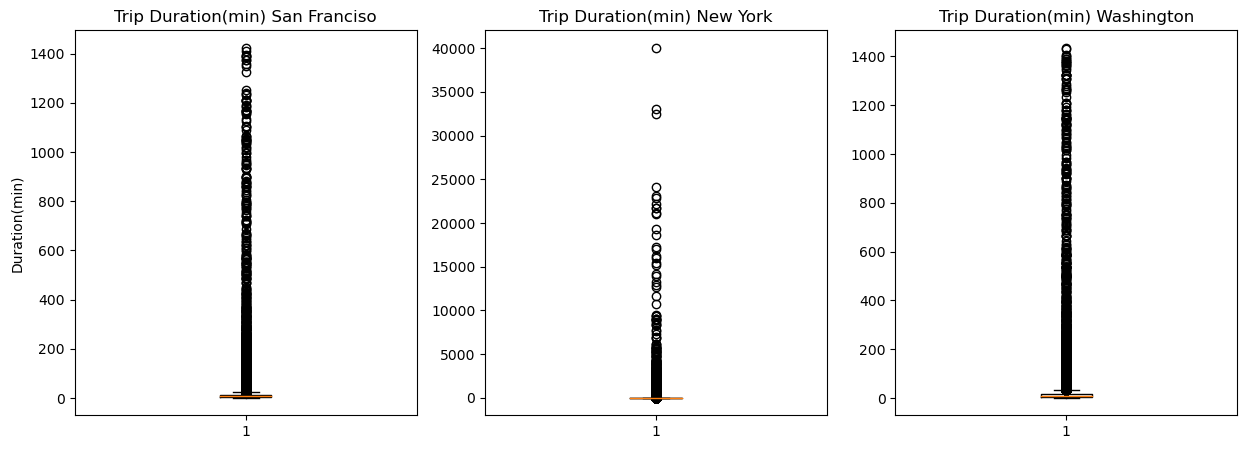

In [55]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1,3,1)
plt.boxplot(df_sf_copy.duration_min)
plt.ylabel('Duration(min)')
plt.title('Trip Duration(min) San Franciso')

plt.subplot(1,3,2)
plt.boxplot(df_nyc_copy.duration_min)
plt.title('Trip Duration(min) New York')

plt.subplot(1,3,3)
plt.boxplot(df_dc_copy.duration_min)
plt.title('Trip Duration(min) Washington')

Looking at the three dataset trip duration variables, we can see that there are some Outliers in the datasets, However these outliers are less than 2% of the datasets. We can subset the datasets and get trip durations lesser than or equal to 60 Minutes (3600 secs)

In [56]:
df_sf_copy = df_sf_copy[df_sf_copy.duration_min <= 60]
df_sf_copy.shape

(181512, 21)

In [57]:
df_nyc_copy = df_nyc_copy[df_nyc_copy.duration_min <= 60]
df_nyc_copy.shape

(939105, 20)

In [59]:
df_dc_copy = df_dc_copy[df_dc_copy.duration_min <= 60]
df_dc_copy.shape

(154879, 13)

#### Re-Plotting the Trip Distribution after subsetting using log scale to eliminate long tails

In [60]:
np.log10([df_sf_copy.duration_min.describe(),df_nyc_copy.duration_min.describe(),df_dc_copy.duration_min.describe()])

array([[5.25890534, 1.01672941, 0.87445606, 0.        , 0.73239376,
        0.92941893, 1.1172713 , 1.77815125],
       [5.97271415, 1.05510673, 0.94702057, 0.        , 0.71600334,
        0.93449845, 1.161368  , 1.77815125],
       [5.18999254, 1.07144204, 0.93340454, 0.        , 0.76342799,
        0.97312785, 1.18752072, 1.77815125]])

Text(0.5, 1.0, 'Trip Duration(min) for Washington DC Metro')

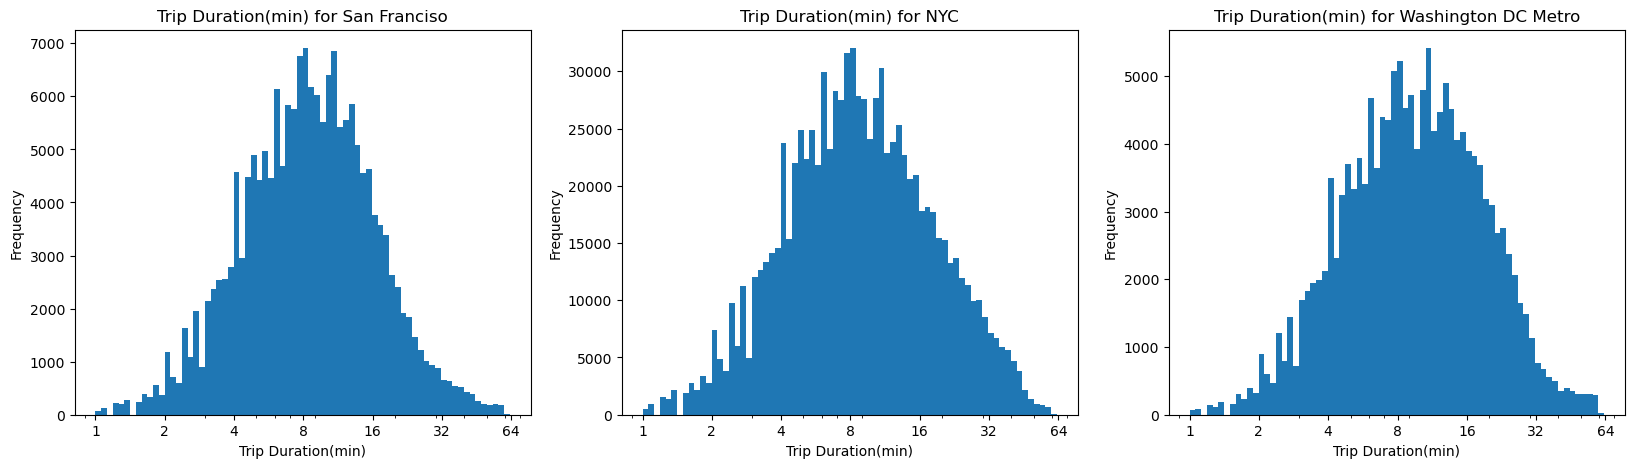

In [61]:
def city_dist(city,name):
        binsize = 0.025
        bins = 10 ** np.arange(0, 1.778+binsize, binsize)
        plt.hist(data = city, x = 'duration_min', bins = bins);
        plt.xscale('log')
        x_ticks=[1,2,4,8,16,32,64]
        plt.xticks(x_ticks,x_ticks)
        plt.xlabel('Trip Duration(min)')
        plt.ylabel('Frequency')
        plt.title('Trip Duration(min) for {}'.format(name));
        
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC ']]
i=1
plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    city_dist(city[0],city[1])
    i += 1

From the Log Plot of the 3 Trip Duration(min) we can see observe that the 3 Cities have somewhat similar shaped distribution. The Trip duration for the 3 Cities is fairly Unimodal, with Franciso having close peaks around 8 minutes and 12 mins. New York City and Washington DC are Unimodal with their peaks around 8 minutes and 10 minutes respectively.

### 2. What is the member's Age for San Franciso and New York Cities? 

Text(0.5, 1.0, 'Age Distribution for New York City members')

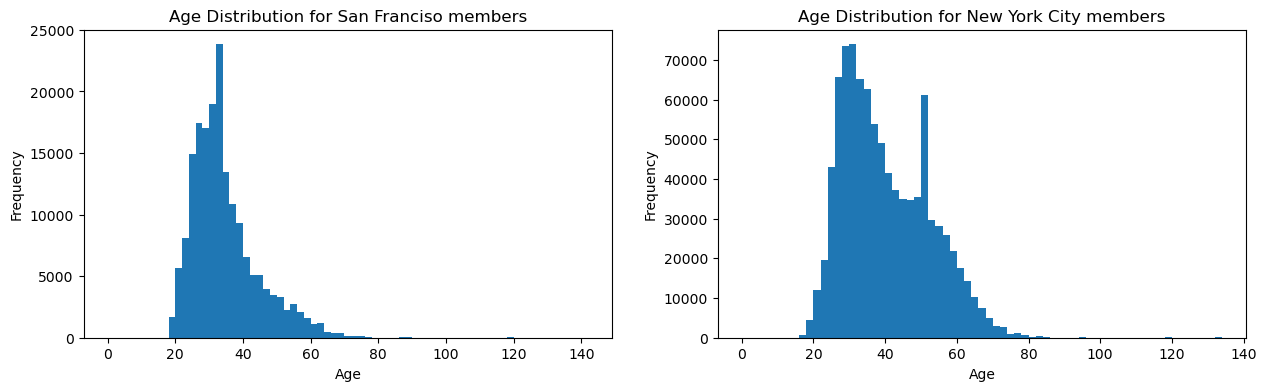

In [62]:
plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
bins = np.arange(0, df_sf_copy.age.max()+2, 2)
plt.hist(data = df_sf_copy, x = 'age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for San Franciso members')

plt.subplot(1,2,2)
bins = np.arange(0, df_nyc_copy.age.max()+2, 2)
plt.hist(data = df_nyc_copy, x = 'age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for New York City members')

As seen from the histogram plot the Age distribution for San Franciso members is Unimodal and skewed to the right with peak at age 34 - 36, while the age distribution for San Franciso is Fairly Bimodal with peaks at age 28-30 and age 50-52. 

### 3. What is the  Gender Proportion For Bike Sharers in San Franciso and New York?

Making the df_nyc_copy (New York) Gender Column Uniform with that of df_sf_copy (San Franciso)

In [63]:
df_nyc_copy['gender']= df_nyc_copy['gender'].replace([0,1,2],['others','Male','Female'])

In [158]:
df_nyc_copy.gender.value_counts()

Male      701132
Female    202571
others     35402
Name: gender, dtype: int64

In [106]:
def gender_dist(city,name):
    city_val = city.gender.value_counts()
    n_sum = city.gender.value_counts().sum() #Total sum of values
    max_val = city.gender.value_counts()[0] #Max Value
    order_w = city.gender.value_counts().index
    max_prop = max_val/n_sum
    tick_props = np.arange(0, max_prop+0.2, 0.2)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plt.figure(figsize=[15,3])

    sb.countplot(data=city, x='gender',color=sb.color_palette()[i-2],order=order_w);
    plt.yticks(tick_props*n_sum,tick_names)
    locs, labels = plt.xticks(rotation=0)
    for loc, label in zip(locs, labels):
        count = city_val[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_sum)
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')    
    plt.ylabel('Proportion')
    plt.xlabel('Gender')
    plt.title('Gender  Distribution for {} Bike Sharers'.format(name))

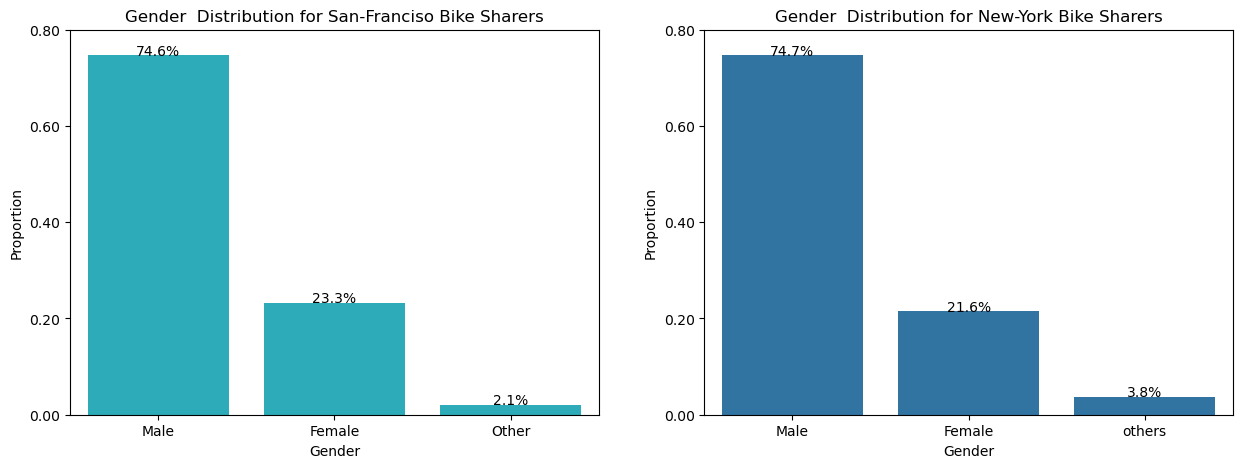

In [107]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York']]

i=1

plt.figure(figsize=[15,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    gender_dist(city[0],city[1])
    i += 1

From the Gender distribution of the Two cities we can see that there are similarities in the male gender proportion in both cities, but the female proportion in San Franciso (23.3%) is slightly higher than the female proportion in New york(21.6%). Also a larger proportion of people are in the others category for New York compared to San Franciso.

### 4. What is the distribution for User Type across the 3 cities 

In [102]:
df_dc_copy.rename(columns={'Member type':'user_type'},inplace=True)

In [103]:
df_nyc_copy.rename(columns={'usertype':'user_type'},inplace=True)

In [110]:
def user_type_dist(city,name):
    city_val = city.user_type.value_counts()
    n_sum = city.user_type.value_counts().sum() #Total sum of values
    max_val = city.user_type.value_counts()[0] #Max Value
    order_w = city.user_type.value_counts().index
    max_prop = max_val/n_sum
    tick_props = np.arange(0, max_prop+0.2, 0.2)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plt.figure(figsize=[15,3])

    base_color = sb.color_palette()[0]
    sb.countplot(data=city, x='user_type',color=sb.color_palette()[i-2],order=order_w);
    plt.yticks(tick_props*n_sum,tick_names)
    locs, labels = plt.xticks(rotation=0)
    for loc, label in zip(locs, labels):
        count = city_val[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_sum)
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')    
    plt.ylabel('Proportion')
    plt.xlabel('User Type')
    plt.title('User-Type  Distribution for {} Bike Sharers'.format(name))

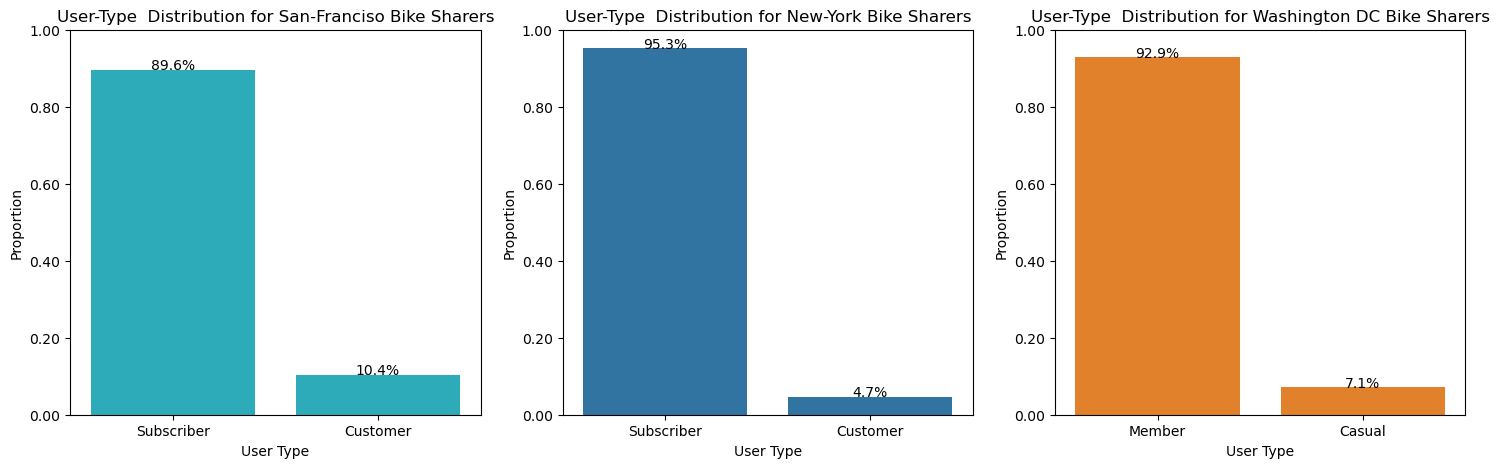

In [111]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[18,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    user_type_dist(city[0],city[1])
    i += 1

From User type distribution chart, it can be observed that New York City Bike sharers had the highest ratio of subcribers to customers who use the Bike sharing service, followed closely by Washington then San Franciso.

### 5. What days of the week Received the Highest Traffic ?

Let's set the categories for both the Day of the week and Period of the day.

In [112]:
df_sf_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'gender', 'bike_share_for_all_trip',
       'duration_min', 'age', 'hour', 'period_of_day', 'day_of_week'],
      dtype='object')

In [73]:
cities = [df_sf_copy,df_nyc_copy,df_dc_copy]

ordinal_var_dict = {'period_of_day': ['Early Morning','Late Morning','Early Afternoon','Late Afternoon','Early Evening','Late Evening'],
                    'day_of_week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']}

for city in cities:
    for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        city[var] = city[var].astype(ordered_var)

#### Day of the Week  Traffic Distribution among the 3 Cities

In [113]:
def day_week(city,name):
        sb.countplot(data=city, x='day_of_week',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Day of week Traffic - {}'.format(name))


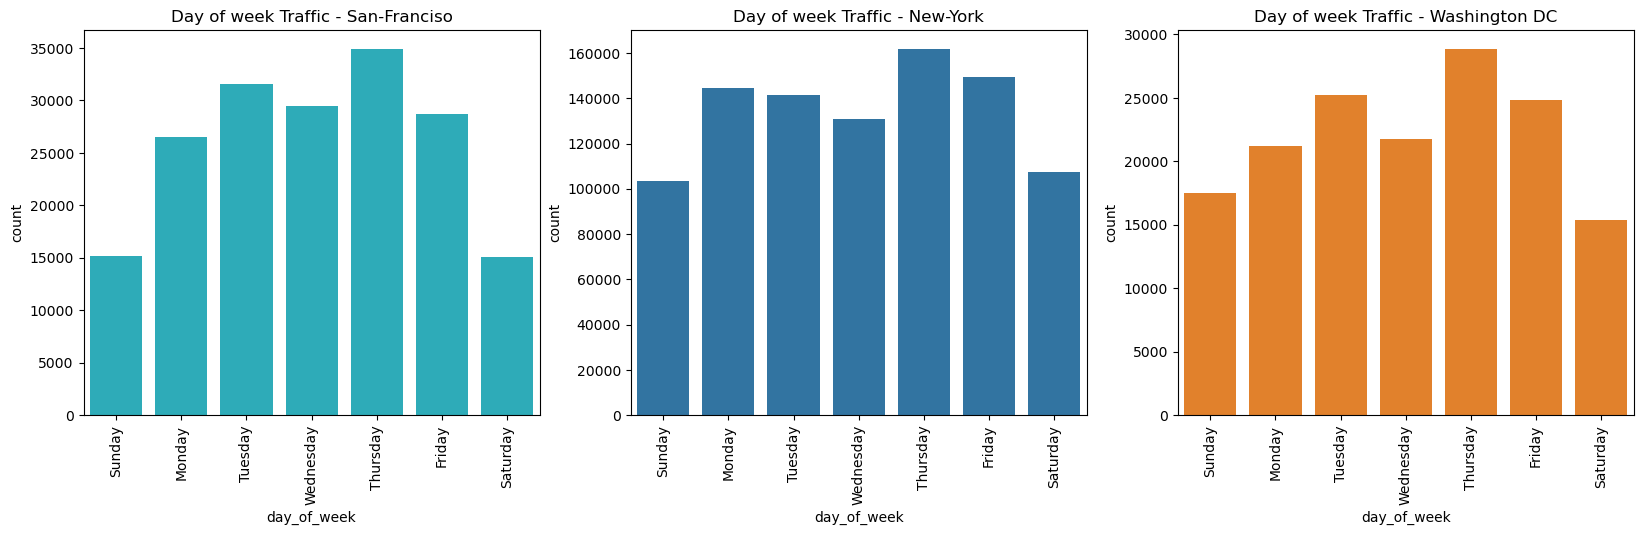

In [115]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    day_week(city[0],city[1])
    i += 1

As seen from the Day of week chart , Thursday is the day with the most traffic common in the 3 Cities. For NYC, Friday is the next busiest day, while for both San Franciso and Washington DC, Tuesday is the next busy day.

#### Period of the Day Distribution among the 3 Cities

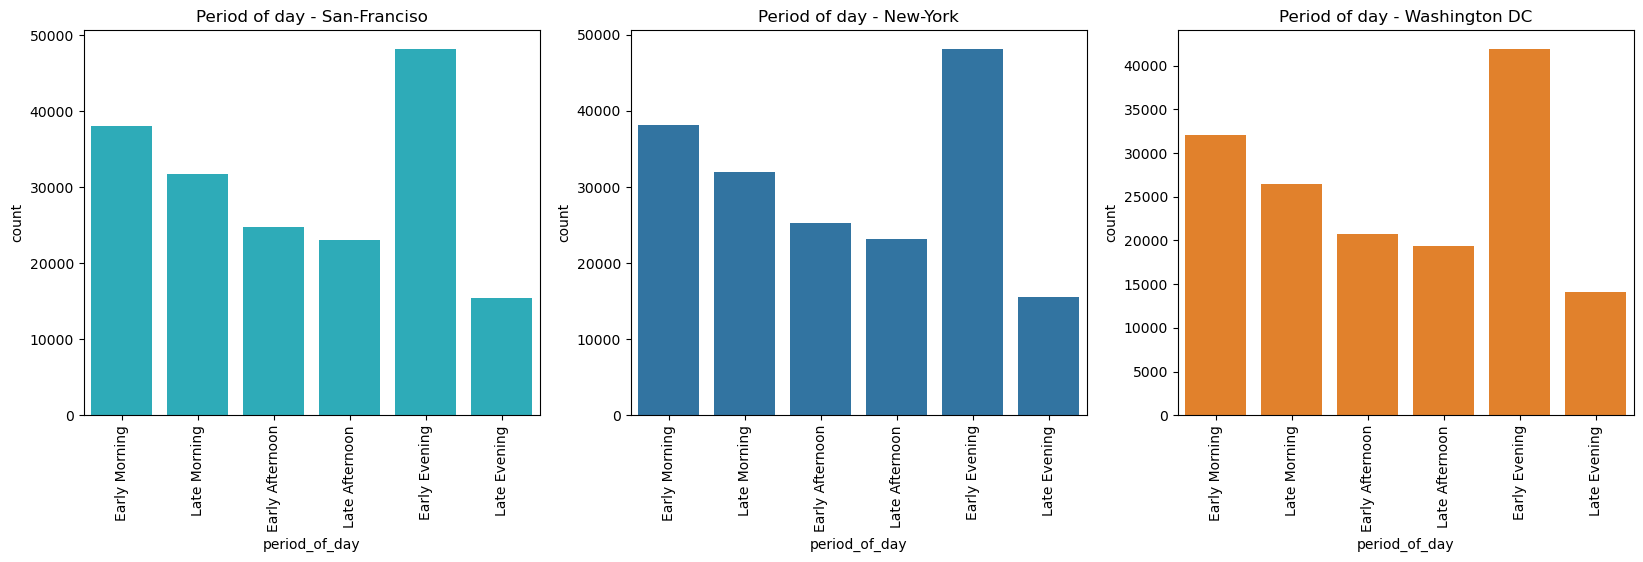

In [117]:
def day_period(city,name):
        sb.countplot(data=city, x='period_of_day',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Period of day - {}'.format(name))


city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    day_period(city[0],city[1])
    i += 1


For period of day traffic, we can see that the busiest time of the day amongst the 3 cities is Early Evening ( Between 5pm and 8pm daily) while the least Busiest time of the day is Late Evening (Between 8pm and midnight)



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

On the Trip Duration: I had to get rid of some outliers that were less than 2 percent of the dataset, also had to a log transformation to better depict the shape of the distribution.

From the Log Plot of the 3 Trip Duration(min) we can see observe that the 3 Cities have somewhat similar shaped distribution. The Trip duration for the 3 Cities is fairly Unimodal, with Franciso having close peaks around 8 minutes and 12 mins. New York City and Washington DC are Unimodal with their peaks around 8 minutes and 10 minutes respectively.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To get more interesting visualizations, more features were extracted from the existing data. These features are Age, period of the day and Day of the week were extracted from Start Date.

The distribution of the following variables were explored: Members Ages, User types, Gender,Day of the week ,Period of Day. These variables were explored for the three cities.

### Bivariate Distribution

### 6. How does Age Affects The Trip Duration for New York and San Franciso

To avoid over plotting, Let's first sample our data and use equal numbers for both cities.

In [150]:
df_sf_copy_sam = df_sf_copy.sample(3000)
df_nyc_copy_sam = df_sf_copy.sample(3000)

In [151]:
def age_trip(city,name):
    plt.scatter(data = city, x = 'age', y = 'duration_min', alpha = 1/20)
    plt.xlabel('Member Age')
    plt.ylabel('Trip Duration(min)')
    plt.title('Age vs Trip Duration {}'.format(name))

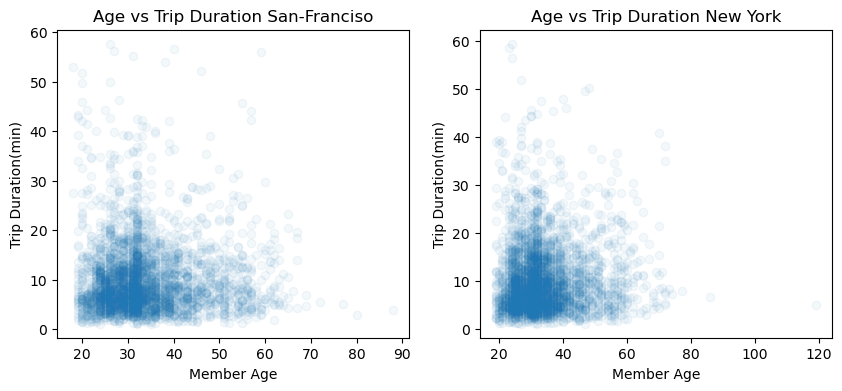

In [152]:
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
age_trip(df_sf_copy_sam,'San-Franciso')

plt.subplot(1,2,2)
age_trip(df_nyc_copy_sam,'New York')

From the scatter plot Visualization for How Age affects Trip Duration.Due to the dataset size difference, We decided to use a sample of 3000, We can see that Both Cities have a Similar scatter distribution with minor differences between both plots. 

7. ### What is Trip Duration Distribution by Period of Day

   #### Remember that our period of the day is as follows
  
         Early Morning: If the Hour of the day is less than 08:00
    
         Late Morning: If the Hour of the day is 09:00 or greater, but less than 12:00. 
              
         Early Afternoon: If the Hour of the day is 12:00 or greater, but less than 15:00
              
         Late Afternoon: If the Hour of the day is 15:00 or greater, but less than 17:00
              
         Early Evening: If the Hour of the day is 17:00 or greater, but less than 20:00
              
         Late Evening: if the Hour of the day is 20:00 or greater
      

In [127]:
def trip_by_day(city,name):
        sb.boxplot(data=df_sf_copy,x='period_of_day',y='duration_min',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Trip Duration by Period of day - {}'.format(name))
  
        
 


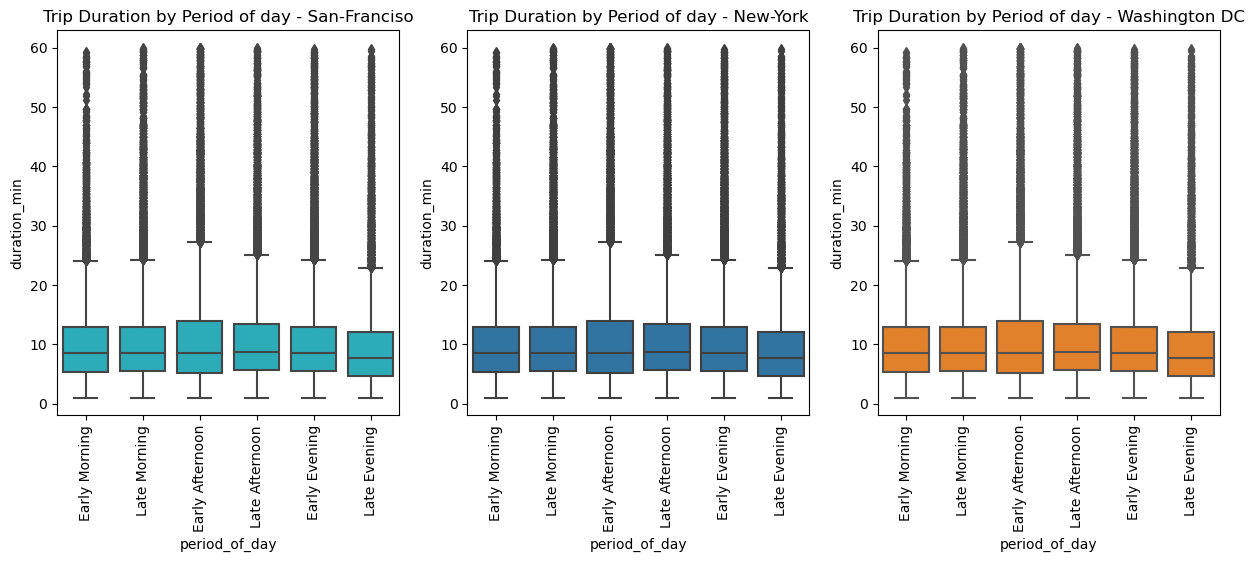

In [128]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[15,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    trip_by_day(city[0],city[1])
    i += 1



From the above investigation , It can be seen that Early afternoon(Periods Bewteen 12pm - 3pm) Has the largest interquartile range, these means the distribution of Trip duration varies mostly in early afternoon than other periods of the day, Early afternoon also has the max duration value across the 3 cities. Also the median duration for late evenings(8pm - midnight) tends to be the lowest for the 3 cities.

### 8. What is Trip Duration By Day of the week?

In [129]:
def trip_day_week(city,name):
        sb.boxplot(data=df_sf_copy,x='day_of_week',y='duration_min',color=sb.color_palette()[i-2]);
        plt.xticks(rotation=90);
        plt.title('Trip Duration by Day of Week - {}'.format(name))

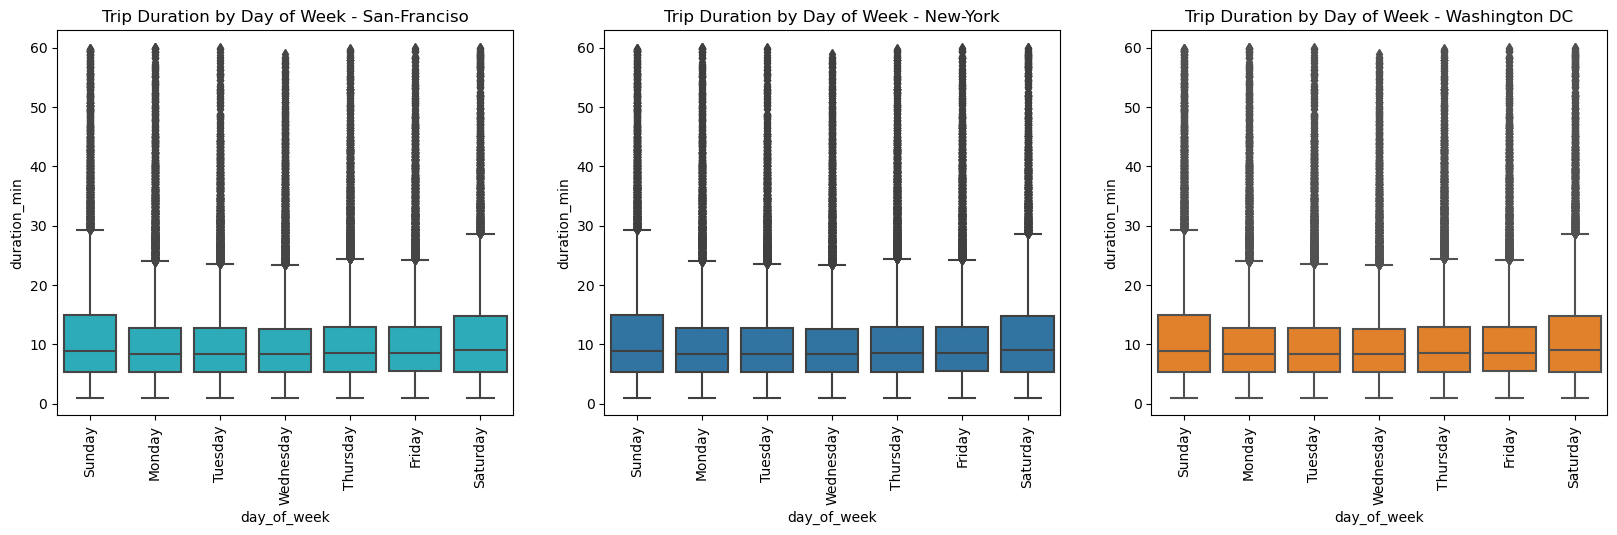

In [130]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York'],[df_dc_copy,'Washington DC']]

i=1

plt.figure(figsize=[20,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    trip_day_week(city[0],city[1])
    i += 1


From the box plots of day of week by duration, it can be observed that Saturday and Sundays have the biggest interquartile ranges for the 3 cities, This means that the duration for these days varies mostly Than the rest of the week.

### 9. How is User type distributed across Gender for San Franciso and New York City?

In [131]:
df_sf_copy = df_sf_copy.rename(columns={'member_gender':'gender'})

In [132]:
def user_gender(city,name):
        sb.countplot(data=city,x='gender',hue='user_type');
        plt.xticks(rotation=90);
        plt.title('UserType & Gender for each city - {}'.format(name))

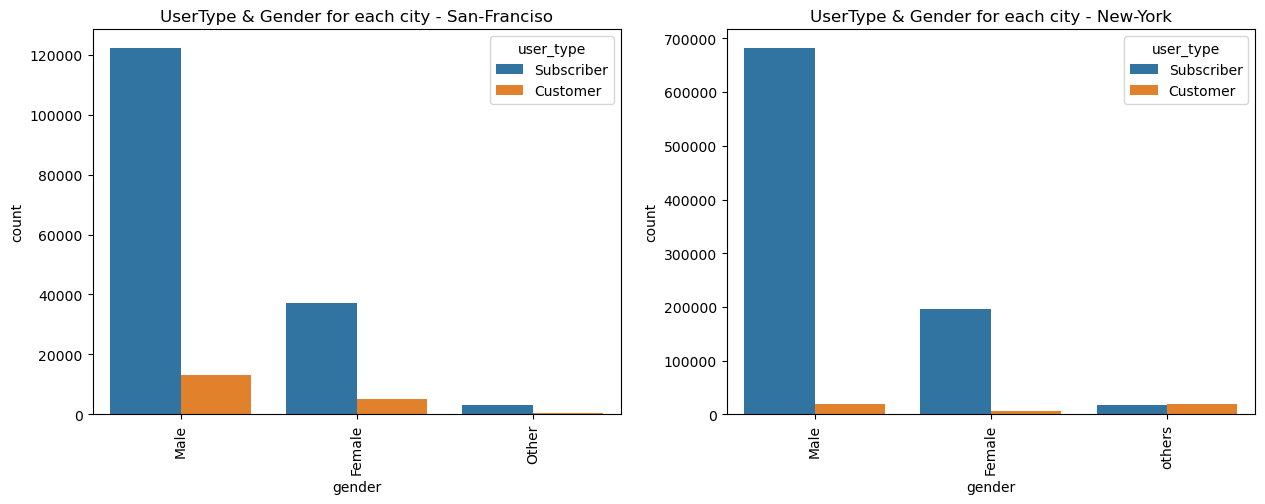

In [133]:
city_name = [[df_sf_copy,'San-Franciso'],[df_nyc_copy,'New-York']]
i=1
plt.figure(figsize=[15,5])

for city in city_name:
    plt.subplot(1,len(city_name),i)
    user_gender(city[0],city[1])
    i += 1


From the User Type by Gender Chart, it can be seen that the ratio of customers compared to Subcribers for both Male and Female in San Franciso is higher than that for New york.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### For Trip Duration vs Age
From the scatter plot Visualization for How Age affects Trip Duration.Due to the dataset size difference, We decided to use a sample of 5000, We can see that Both Cities have a Similar chart with minor differnces between both plots.

#### For Trip Duration Versus Period of the Day 
It can be seen that Early afternoon(Periods Bewteen 12pm - 3pm) Has the largest interquartile range, these means the distribution of Trip duration varies mostly in early afternoon than other periods of the day, Early afternoon also has the max duration value across the 3 cities. Also the median duration for late evenings(8pm - midnight) tend to be lower than the medians for the rest of the day.

#### For Trip Duration Vs Day of the Week
From the box plots of day of week by duration, it can be observed that Saturday and Sundays have the biggest interquartile ranges for the 3 cities, This means that the duration for these days are more spread out Than the rest of the week.




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### For User type distribution across Gender
From the User Type by Gender Chart, it can be observed that the male and female proportion of customers compared to Subcribers is higher for San Franciso than for New york.

### Average Age and Trip Duration for 3 Cities

For San Franciso

In [87]:
df_sf_copy.groupby('user_type')[['duration_min','age']].mean()

,duration_min,age
user_type,,
Customer,15.218200,33.387934
Subscriber,9.835281,34.177402


For NYC

In [134]:
df_nyc_copy.groupby('user_type')[['duration_min','age']].mean()

,duration_min,age
user_type,,
Customer,19.919107,39.020882
Subscriber,10.931243,39.809416


For Washington DC

In [135]:
df_dc_copy.groupby('user_type')['duration_min'].mean()

user_type
Casual    22.683129
Member    10.949707
Name: duration_min, dtype: float64

## Multivariate Exploration



### 10. Let see how User_type and Gender play into Trip vs Age relationship for both San Franciso and New York Cities

To avoid over plotting, let's make use of the sample data set we created earlier

### For NYC

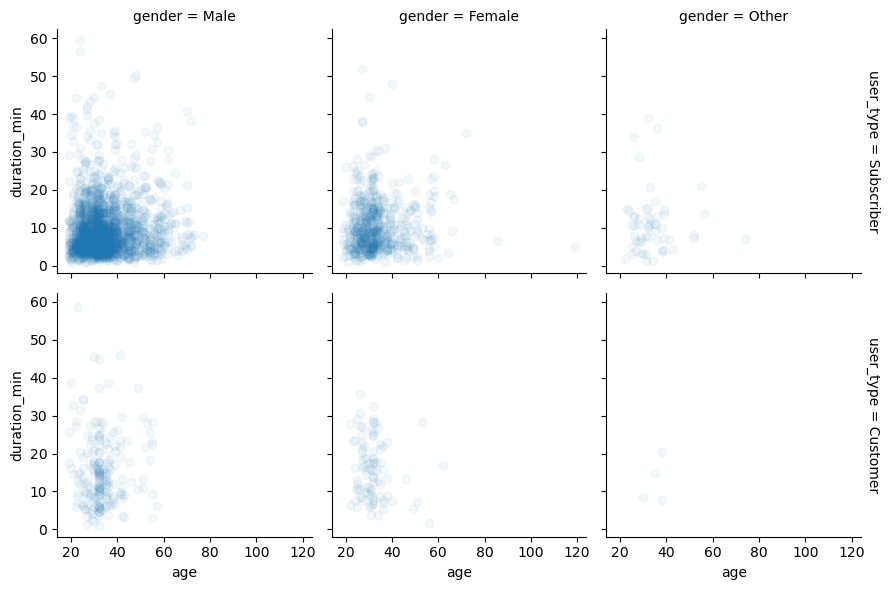

In [157]:
g = sb.FacetGrid(data=df_nyc_copy_sam,col='gender',row='user_type',margin_titles=True,col_order=['Male','Female','Other']);
g.map(plt.scatter,'age','duration_min',alpha=1/20);
#plt.title('User Type & Gender in Trip Duration vs Age for NYC')

### For San Franciso

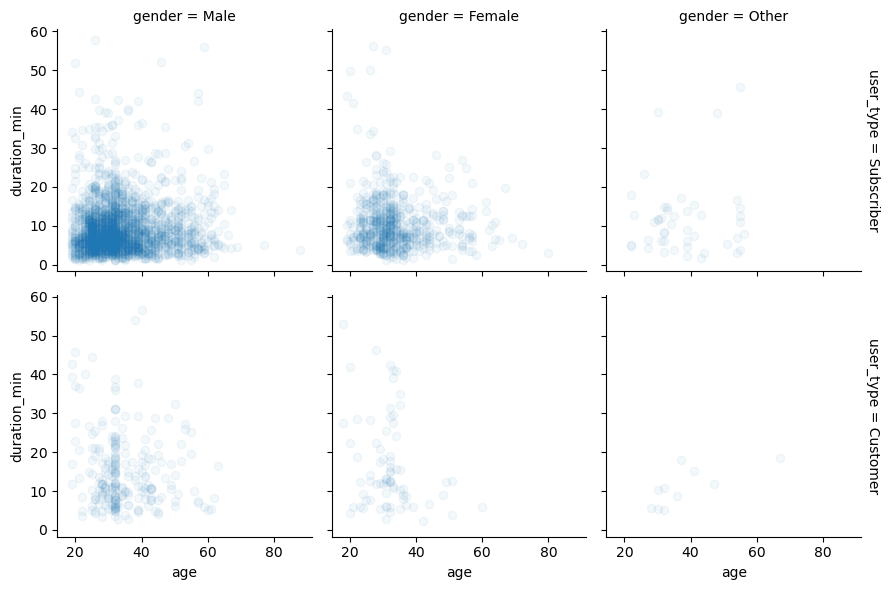

In [156]:
g = sb.FacetGrid(data=df_sf_copy_sam,col='gender',row='user_type',margin_titles=True,col_order=['Male','Female','Other'])
g.map(plt.scatter,'age','duration_min',alpha=1/20)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the FacetGrid Plots of both San Franciso and New York, We can see that San Franciso has a wider age spread that engage in bike sharing for longer time for both gender and user type. This is an important observation across both cities.


### Were there any interesting or surprising interactions between features?

Yes , the wider age spread in the Multivarite exploration including both gender and user type is more informative than the BiVariate distribution of Trip Duration vs Age across both cities that was investigated earlier.

## Conclusions
The project is investigating bike share datasets for San Franciso, New York and Washington DC. The purpose of the project was to explore the datasets to compare differences in variables across the 3 cities. The datasets were first wrangled to clean some missing data and some outlier observations. Other features were extracted to produce informative explorations. The variable of interest was the Trip duration (minutes), while other features extracted were : Gender,Age,Period of Day,Day of Week and User Type. while the results of these feature comparisons were similar across the three cities, some other features revealed some differences such as the age spread , Percentage of user type and Average Trip duration between Customers and Subcribers, for the three cities.